## Nueral Network Tutorial in PyTorch
http://cs231n.github.io/neural-networks-case-study/

In [2]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.version

'2.7.12 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:42:40) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

(-1, 1)

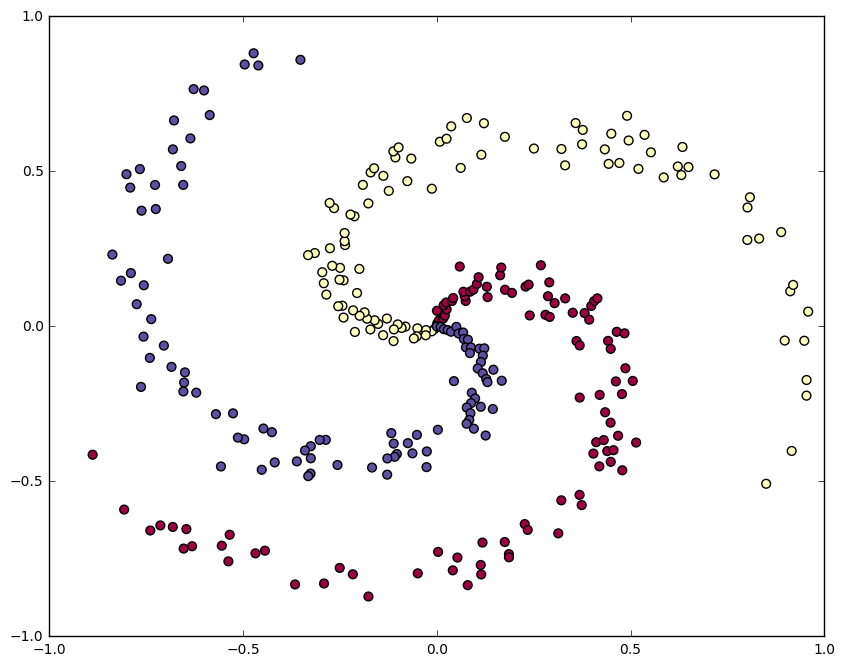

In [4]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

##### pytorch

In [7]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torch

In [8]:
net0 = nn.Linear(2,500)
net = nn.Linear(500, 3)

def convertFloat(Q):
   # convert X double to float type
    qarr = np.array(Q)
    qfloat = qarr.astype(float)
    Qpt = Variable(torch.Tensor(qfloat)) 
    return Qpt

def convertLong(Q):
   # convert X double to long type
    qarr = np.array(Q)
    qlong = qarr.astype(long)
    Qpt = Variable(torch.LongTensor(qlong)) 
    return Qpt

Xpt = convertFloat(X)
labels = convertLong(y)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for i in xrange(100000):
    # zero the parameter gradients
    optimizer.zero_grad()
    outputs = net0(Xpt)
    outputs = F.relu(outputs)
    outputs = net(outputs)
    loss = criterion(outputs, labels)
    loss.backward()        
    optimizer.step()
    running_loss = loss.data[0]
    if ( i % 2000 == 0):
        print('[%5d] loss: %.3f' % (i+1, running_loss ))



[    1] loss: 1.116
[ 2001] loss: 0.593
[ 4001] loss: 0.495
[ 6001] loss: 0.432
[ 8001] loss: 0.386
[10001] loss: 0.352
[12001] loss: 0.325
[14001] loss: 0.303
[16001] loss: 0.285
[18001] loss: 0.270
[20001] loss: 0.257
[22001] loss: 0.245
[24001] loss: 0.235
[26001] loss: 0.226
[28001] loss: 0.218
[30001] loss: 0.211
[32001] loss: 0.205
[34001] loss: 0.199
[36001] loss: 0.193
[38001] loss: 0.188
[40001] loss: 0.184
[42001] loss: 0.180
[44001] loss: 0.176
[46001] loss: 0.172
[48001] loss: 0.168
[50001] loss: 0.165
[52001] loss: 0.162
[54001] loss: 0.159
[56001] loss: 0.156
[58001] loss: 0.154
[60001] loss: 0.151
[62001] loss: 0.149
[64001] loss: 0.147
[66001] loss: 0.145
[68001] loss: 0.143
[70001] loss: 0.141
[72001] loss: 0.139
[74001] loss: 0.137
[76001] loss: 0.136
[78001] loss: 0.134
[80001] loss: 0.132
[82001] loss: 0.131
[84001] loss: 0.129
[86001] loss: 0.128
[88001] loss: 0.127
[90001] loss: 0.125
[92001] loss: 0.124
[94001] loss: 0.123
[96001] loss: 0.122
[98001] loss: 0.121


In [9]:
#forward pass
outputs = net0(Xpt)
outputs = F.relu(outputs)
outputs = net(outputs)

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% predicted[j][0] for j in range(300)))
print('Actual: ', ' '.join('%5s'% y[j] for j in range(300)))

('Predicted: ', '    2     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     2     2     2     1     2     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1

In [10]:
correct = 0
total = 0

outputs = net0(Xpt)
outputs = F.relu(outputs)
outputs = net(outputs)

_, predicted = torch.max(outputs.data, 1)
total += labels.size(0)

qarr = np.array(y)
qlong = qarr.astype(long)

ytensor = torch.LongTensor(qlong)
correct += (predicted == ytensor).sum()
print('Accuracy of the network : %d %%' % (100 * correct / total))

Accuracy of the network : 97 %


In [11]:
Wpt = net0.parameters().next()
bpt = net0.parameters().next()
W2pt = net.parameters().next()
b2pt = net.parameters().next()

W = Wpt.data.numpy()
b = bpt.data.numpy()
W2 = W2pt.data.numpy()
b2 = b2pt.data.numpy()

Wt = W.T
W2t = W2.T

In [12]:
print (Wt.shape)
print (W2t.shape)
b_1 = b[:,[1]].T
b2_1 = b2[:,[1]].T

(2, 500)
(500, 3)


(36284, 1)


(-1.8712034092398278, 1.8687965907601756)

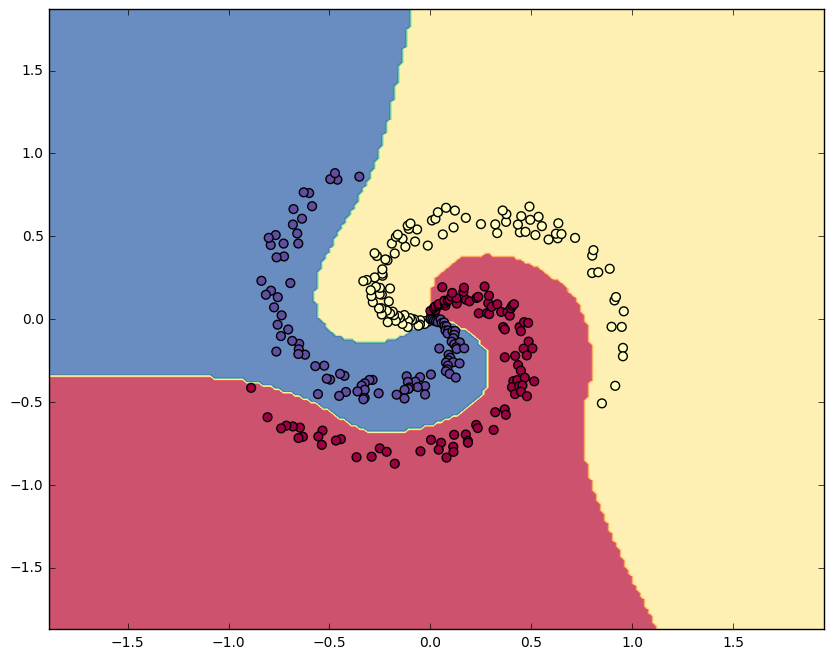

In [13]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

test = np.c_[xx.ravel(), yy.ravel()]
testpt = convertFloat(test)
outputs = net0(testpt)
outputs = F.relu(outputs)
outputs = net(outputs)

_, predicted = torch.max(outputs.data, 1)
#total += labels.size(0)
print (predicted.numpy().shape)

# print (Xpt.data.numpy().shape)
# print (test.shape)
#Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], Wt) + b_1), W2t) + b2_1
#Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], Wt) ), W2t) 

Z = predicted.numpy()
#Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())